## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  93.967284   508.529859  0.018941   7.570746  0.148281
1   1.630623   724.847768  0.474227  10.822037  1.573741
2  72.794161   414.939228  0.219901  10.148976  0.929168
3  85.275281   898.671916  0.681027   1.297289  1.348047
4  78.459530  1285.039546  0.999926   1.130147  1.322534


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.10588 | train_mse: 3.51921 | train_mae: 1.48254 |  0:00:00s
epoch 1  | loss: 0.98169 | train_mse: 3.24918 | train_mae: 1.41679 |  0:00:00s
epoch 2  | loss: 0.65297 | train_mse: 2.78204 | train_mae: 1.31488 |  0:00:00s


epoch 3  | loss: 0.36295 | train_mse: 1.84601 | train_mae: 1.03626 |  0:00:00s
epoch 4  | loss: 0.69322 | train_mse: 1.48965 | train_mae: 0.90464 |  0:00:01s


epoch 5  | loss: 0.65863 | train_mse: 2.23565 | train_mae: 1.01971 |  0:00:01s
epoch 6  | loss: 0.545   | train_mse: 1.19593 | train_mae: 0.83163 |  0:00:01s
epoch 7  | loss: 0.55455 | train_mse: 0.76705 | train_mae: 0.64522 |  0:00:01s


epoch 8  | loss: 0.36405 | train_mse: 0.62197 | train_mae: 0.58107 |  0:00:01s
epoch 9  | loss: 0.40968 | train_mse: 0.44493 | train_mae: 0.5049  |  0:00:01s
epoch 10 | loss: 0.37873 | train_mse: 0.42013 | train_mae: 0.50121 |  0:00:01s


epoch 11 | loss: 0.19214 | train_mse: 0.44496 | train_mae: 0.51686 |  0:00:01s
epoch 12 | loss: 0.18808 | train_mse: 0.45219 | train_mae: 0.51476 |  0:00:01s
epoch 13 | loss: 0.20567 | train_mse: 0.39191 | train_mae: 0.48666 |  0:00:01s


epoch 14 | loss: 0.24146 | train_mse: 0.36128 | train_mae: 0.46389 |  0:00:01s
epoch 15 | loss: 0.37403 | train_mse: 0.37064 | train_mae: 0.47298 |  0:00:02s
epoch 16 | loss: 0.21505 | train_mse: 0.38636 | train_mae: 0.5076  |  0:00:02s


epoch 17 | loss: 0.22942 | train_mse: 0.30362 | train_mae: 0.45995 |  0:00:02s
epoch 18 | loss: 0.16055 | train_mse: 0.22259 | train_mae: 0.38588 |  0:00:02s
epoch 19 | loss: 0.15038 | train_mse: 0.20328 | train_mae: 0.36769 |  0:00:02s


epoch 20 | loss: 0.21922 | train_mse: 0.22225 | train_mae: 0.37176 |  0:00:02s
epoch 21 | loss: 0.16069 | train_mse: 0.24469 | train_mae: 0.38751 |  0:00:02s
epoch 22 | loss: 0.24471 | train_mse: 0.17319 | train_mae: 0.33977 |  0:00:02s


epoch 23 | loss: 0.13086 | train_mse: 0.14235 | train_mae: 0.29778 |  0:00:02s
epoch 24 | loss: 0.28092 | train_mse: 0.13398 | train_mae: 0.29796 |  0:00:02s
epoch 25 | loss: 0.22339 | train_mse: 0.15474 | train_mae: 0.31822 |  0:00:02s
epoch 26 | loss: 0.1746  | train_mse: 0.18851 | train_mae: 0.35773 |  0:00:02s


epoch 27 | loss: 0.14724 | train_mse: 0.15559 | train_mae: 0.31593 |  0:00:02s
epoch 28 | loss: 0.16882 | train_mse: 0.12934 | train_mae: 0.28578 |  0:00:02s
epoch 29 | loss: 0.32347 | train_mse: 0.13363 | train_mae: 0.29234 |  0:00:03s


epoch 30 | loss: 0.13553 | train_mse: 0.15083 | train_mae: 0.31769 |  0:00:03s
epoch 31 | loss: 0.15838 | train_mse: 0.18134 | train_mae: 0.35117 |  0:00:03s
epoch 32 | loss: 0.18504 | train_mse: 0.16152 | train_mae: 0.33088 |  0:00:03s
epoch 33 | loss: 0.24583 | train_mse: 0.16067 | train_mae: 0.31226 |  0:00:03s


epoch 34 | loss: 0.22903 | train_mse: 0.16107 | train_mae: 0.30343 |  0:00:03s
epoch 35 | loss: 0.27774 | train_mse: 0.13974 | train_mae: 0.3009  |  0:00:03s
epoch 36 | loss: 0.15474 | train_mse: 0.15471 | train_mae: 0.32424 |  0:00:03s
epoch 37 | loss: 0.37587 | train_mse: 0.1513  | train_mae: 0.31464 |  0:00:03s


epoch 38 | loss: 0.25105 | train_mse: 0.14439 | train_mae: 0.29275 |  0:00:03s
epoch 39 | loss: 0.19263 | train_mse: 0.13598 | train_mae: 0.29412 |  0:00:03s
epoch 40 | loss: 0.15112 | train_mse: 0.19306 | train_mae: 0.31826 |  0:00:03s


epoch 41 | loss: 0.32091 | train_mse: 0.24125 | train_mae: 0.34034 |  0:00:03s
epoch 42 | loss: 0.28515 | train_mse: 0.20131 | train_mae: 0.31285 |  0:00:03s
epoch 43 | loss: 0.14749 | train_mse: 0.1617  | train_mae: 0.30407 |  0:00:03s


epoch 44 | loss: 0.19647 | train_mse: 0.12411 | train_mae: 0.28124 |  0:00:04s
epoch 45 | loss: 0.14558 | train_mse: 0.12681 | train_mae: 0.27822 |  0:00:04s
epoch 46 | loss: 0.1499  | train_mse: 0.13005 | train_mae: 0.27583 |  0:00:04s


epoch 47 | loss: 0.34407 | train_mse: 0.15188 | train_mae: 0.29094 |  0:00:04s
epoch 48 | loss: 0.10262 | train_mse: 0.14231 | train_mae: 0.26895 |  0:00:04s
epoch 49 | loss: 0.23378 | train_mse: 0.12326 | train_mae: 0.27122 |  0:00:04s


epoch 50 | loss: 0.16056 | train_mse: 0.12237 | train_mae: 0.27957 |  0:00:04s
epoch 51 | loss: 0.24978 | train_mse: 0.13551 | train_mae: 0.279   |  0:00:04s
epoch 52 | loss: 0.17304 | train_mse: 0.12668 | train_mae: 0.27703 |  0:00:04s


epoch 53 | loss: 0.12322 | train_mse: 0.11352 | train_mae: 0.27428 |  0:00:04s


epoch 54 | loss: 0.12332 | train_mse: 0.13087 | train_mae: 0.29227 |  0:00:04s
epoch 55 | loss: 0.24465 | train_mse: 0.14346 | train_mae: 0.3051  |  0:00:05s
epoch 56 | loss: 0.13979 | train_mse: 0.1345  | train_mae: 0.30292 |  0:00:05s


epoch 57 | loss: 0.18831 | train_mse: 0.1191  | train_mae: 0.28972 |  0:00:05s
epoch 58 | loss: 0.15117 | train_mse: 0.10059 | train_mae: 0.26214 |  0:00:05s
epoch 59 | loss: 0.21903 | train_mse: 0.09994 | train_mae: 0.25764 |  0:00:05s


epoch 60 | loss: 0.16604 | train_mse: 0.11012 | train_mae: 0.2583  |  0:00:05s
epoch 61 | loss: 0.15212 | train_mse: 0.13586 | train_mae: 0.27647 |  0:00:05s
epoch 62 | loss: 0.29641 | train_mse: 0.15626 | train_mae: 0.29919 |  0:00:05s


epoch 63 | loss: 0.26182 | train_mse: 0.12977 | train_mae: 0.27435 |  0:00:05s
epoch 64 | loss: 0.29308 | train_mse: 0.14668 | train_mae: 0.28702 |  0:00:05s


epoch 65 | loss: 0.34464 | train_mse: 0.16125 | train_mae: 0.30211 |  0:00:06s
epoch 66 | loss: 0.24478 | train_mse: 0.14466 | train_mae: 0.28495 |  0:00:06s
epoch 67 | loss: 0.12579 | train_mse: 0.11877 | train_mae: 0.27091 |  0:00:06s


epoch 68 | loss: 0.17156 | train_mse: 0.11028 | train_mae: 0.26924 |  0:00:06s
epoch 69 | loss: 0.13355 | train_mse: 0.09196 | train_mae: 0.24417 |  0:00:06s
epoch 70 | loss: 0.18469 | train_mse: 0.10671 | train_mae: 0.24743 |  0:00:06s


epoch 71 | loss: 0.12232 | train_mse: 0.10517 | train_mae: 0.24387 |  0:00:06s
epoch 72 | loss: 0.12558 | train_mse: 0.0977  | train_mae: 0.23429 |  0:00:06s


epoch 73 | loss: 0.16259 | train_mse: 0.08591 | train_mae: 0.22662 |  0:00:07s


epoch 74 | loss: 0.09388 | train_mse: 0.09214 | train_mae: 0.23392 |  0:00:07s
epoch 75 | loss: 0.20096 | train_mse: 0.08566 | train_mae: 0.23198 |  0:00:07s
epoch 76 | loss: 0.13237 | train_mse: 0.08554 | train_mae: 0.23579 |  0:00:07s


epoch 77 | loss: 0.13768 | train_mse: 0.08424 | train_mae: 0.23057 |  0:00:07s
epoch 78 | loss: 0.20908 | train_mse: 0.09613 | train_mae: 0.24042 |  0:00:07s


epoch 79 | loss: 0.16651 | train_mse: 0.11188 | train_mae: 0.25378 |  0:00:08s


epoch 80 | loss: 0.12039 | train_mse: 0.10623 | train_mae: 0.25028 |  0:00:08s


epoch 81 | loss: 0.10446 | train_mse: 0.10368 | train_mae: 0.24402 |  0:00:08s
epoch 82 | loss: 0.09122 | train_mse: 0.08921 | train_mae: 0.23141 |  0:00:08s


epoch 83 | loss: 0.34343 | train_mse: 0.1002  | train_mae: 0.24805 |  0:00:08s
epoch 84 | loss: 0.137   | train_mse: 0.10971 | train_mae: 0.2548  |  0:00:09s
epoch 85 | loss: 0.13361 | train_mse: 0.10936 | train_mae: 0.2507  |  0:00:09s


epoch 86 | loss: 0.16556 | train_mse: 0.09873 | train_mae: 0.24143 |  0:00:09s
epoch 87 | loss: 0.33287 | train_mse: 0.09003 | train_mae: 0.23764 |  0:00:09s
epoch 88 | loss: 0.18944 | train_mse: 0.10335 | train_mae: 0.25201 |  0:00:09s


epoch 89 | loss: 0.12638 | train_mse: 0.10492 | train_mae: 0.25299 |  0:00:09s


epoch 90 | loss: 0.25202 | train_mse: 0.09773 | train_mae: 0.25662 |  0:00:09s
epoch 91 | loss: 0.12415 | train_mse: 0.09971 | train_mae: 0.26188 |  0:00:10s


epoch 92 | loss: 0.15078 | train_mse: 0.10581 | train_mae: 0.26732 |  0:00:10s
epoch 93 | loss: 0.11318 | train_mse: 0.10976 | train_mae: 0.25314 |  0:00:10s
epoch 94 | loss: 0.16822 | train_mse: 0.11722 | train_mae: 0.25629 |  0:00:10s


epoch 95 | loss: 0.1698  | train_mse: 0.09131 | train_mae: 0.24324 |  0:00:10s
epoch 96 | loss: 0.08795 | train_mse: 0.09177 | train_mae: 0.25078 |  0:00:10s
epoch 97 | loss: 0.1254  | train_mse: 0.08974 | train_mae: 0.24512 |  0:00:10s


epoch 98 | loss: 0.13229 | train_mse: 0.08166 | train_mae: 0.23411 |  0:00:10s
epoch 99 | loss: 0.17579 | train_mse: 0.08388 | train_mae: 0.22743 |  0:00:10s
epoch 100| loss: 0.17562 | train_mse: 0.07862 | train_mae: 0.23143 |  0:00:10s
epoch 101| loss: 0.21652 | train_mse: 0.08396 | train_mae: 0.24237 |  0:00:10s


epoch 102| loss: 0.13303 | train_mse: 0.08346 | train_mae: 0.24214 |  0:00:10s
epoch 103| loss: 0.24998 | train_mse: 0.0851  | train_mae: 0.24137 |  0:00:10s
epoch 104| loss: 0.1781  | train_mse: 0.0851  | train_mae: 0.24034 |  0:00:11s


epoch 105| loss: 0.3096  | train_mse: 0.08658 | train_mae: 0.23731 |  0:00:11s
epoch 106| loss: 0.14364 | train_mse: 0.08247 | train_mae: 0.23974 |  0:00:11s
epoch 107| loss: 0.09382 | train_mse: 0.0858  | train_mae: 0.24211 |  0:00:11s


epoch 108| loss: 0.13287 | train_mse: 0.10538 | train_mae: 0.26134 |  0:00:11s
epoch 109| loss: 0.11972 | train_mse: 0.10413 | train_mae: 0.26023 |  0:00:11s
epoch 110| loss: 0.25578 | train_mse: 0.08846 | train_mae: 0.24629 |  0:00:11s
epoch 111| loss: 0.11787 | train_mse: 0.08905 | train_mae: 0.24204 |  0:00:11s


epoch 112| loss: 0.08523 | train_mse: 0.09478 | train_mae: 0.2517  |  0:00:11s
epoch 113| loss: 0.13719 | train_mse: 0.09758 | train_mae: 0.25965 |  0:00:11s
epoch 114| loss: 0.1365  | train_mse: 0.08816 | train_mae: 0.2461  |  0:00:11s
epoch 115| loss: 0.11407 | train_mse: 0.06965 | train_mae: 0.22654 |  0:00:11s


epoch 116| loss: 0.0899  | train_mse: 0.07327 | train_mae: 0.22975 |  0:00:11s
epoch 117| loss: 0.10807 | train_mse: 0.08356 | train_mae: 0.23628 |  0:00:11s
epoch 118| loss: 0.20704 | train_mse: 0.08925 | train_mae: 0.24518 |  0:00:12s


epoch 119| loss: 0.20973 | train_mse: 0.0785  | train_mae: 0.22892 |  0:00:12s
epoch 120| loss: 0.15609 | train_mse: 0.0686  | train_mae: 0.22249 |  0:00:12s
epoch 121| loss: 0.10103 | train_mse: 0.06585 | train_mae: 0.21724 |  0:00:12s


epoch 122| loss: 0.23668 | train_mse: 0.068   | train_mae: 0.21073 |  0:00:12s
epoch 123| loss: 0.16529 | train_mse: 0.07264 | train_mae: 0.22117 |  0:00:12s


epoch 124| loss: 0.1371  | train_mse: 0.06937 | train_mae: 0.21579 |  0:00:12s


epoch 125| loss: 0.16556 | train_mse: 0.07033 | train_mae: 0.21809 |  0:00:12s
epoch 126| loss: 0.14566 | train_mse: 0.07181 | train_mae: 0.21923 |  0:00:13s
epoch 127| loss: 0.10847 | train_mse: 0.06843 | train_mae: 0.22002 |  0:00:13s


epoch 128| loss: 0.24055 | train_mse: 0.07498 | train_mae: 0.22943 |  0:00:13s
epoch 129| loss: 0.10594 | train_mse: 0.08734 | train_mae: 0.23938 |  0:00:13s
epoch 130| loss: 0.12098 | train_mse: 0.08944 | train_mae: 0.23782 |  0:00:13s


epoch 131| loss: 0.09453 | train_mse: 0.07684 | train_mae: 0.22282 |  0:00:13s
epoch 132| loss: 0.17946 | train_mse: 0.08096 | train_mae: 0.23471 |  0:00:13s
epoch 133| loss: 0.13227 | train_mse: 0.08271 | train_mae: 0.23916 |  0:00:13s


epoch 134| loss: 0.20158 | train_mse: 0.07564 | train_mae: 0.23171 |  0:00:13s
epoch 135| loss: 0.22107 | train_mse: 0.07721 | train_mae: 0.2303  |  0:00:13s
epoch 136| loss: 0.09175 | train_mse: 0.08934 | train_mae: 0.23435 |  0:00:13s


epoch 137| loss: 0.09625 | train_mse: 0.0924  | train_mae: 0.23414 |  0:00:13s
epoch 138| loss: 0.07183 | train_mse: 0.0945  | train_mae: 0.23546 |  0:00:13s
epoch 139| loss: 0.12337 | train_mse: 0.08037 | train_mae: 0.2239  |  0:00:13s


epoch 140| loss: 0.1137  | train_mse: 0.07316 | train_mae: 0.2226  |  0:00:14s
epoch 141| loss: 0.11805 | train_mse: 0.07018 | train_mae: 0.22434 |  0:00:14s
epoch 142| loss: 0.19587 | train_mse: 0.07506 | train_mae: 0.2246  |  0:00:14s
epoch 143| loss: 0.11844 | train_mse: 0.10839 | train_mae: 0.24864 |  0:00:14s


epoch 144| loss: 0.10541 | train_mse: 0.13362 | train_mae: 0.26131 |  0:00:14s
epoch 145| loss: 0.08378 | train_mse: 0.10623 | train_mae: 0.2427  |  0:00:14s
epoch 146| loss: 0.10911 | train_mse: 0.09938 | train_mae: 0.24029 |  0:00:14s


epoch 147| loss: 0.15932 | train_mse: 0.11342 | train_mae: 0.25613 |  0:00:14s
epoch 148| loss: 0.19497 | train_mse: 0.13715 | train_mae: 0.27492 |  0:00:14s
epoch 149| loss: 0.18714 | train_mse: 0.125   | train_mae: 0.25809 |  0:00:14s
epoch 150| loss: 0.07948 | train_mse: 0.09771 | train_mae: 0.23881 |  0:00:14s


epoch 151| loss: 0.12513 | train_mse: 0.11404 | train_mae: 0.25185 |  0:00:14s
epoch 152| loss: 0.10736 | train_mse: 0.09497 | train_mae: 0.2251  |  0:00:14s
epoch 153| loss: 0.1037  | train_mse: 0.09202 | train_mae: 0.22192 |  0:00:14s


epoch 154| loss: 0.08561 | train_mse: 0.08796 | train_mae: 0.2239  |  0:00:15s
epoch 155| loss: 0.09926 | train_mse: 0.07068 | train_mae: 0.21487 |  0:00:15s
epoch 156| loss: 0.22889 | train_mse: 0.06643 | train_mae: 0.20778 |  0:00:15s


epoch 157| loss: 0.13663 | train_mse: 0.07194 | train_mae: 0.21362 |  0:00:15s
epoch 158| loss: 0.25143 | train_mse: 0.13036 | train_mae: 0.26315 |  0:00:15s
epoch 159| loss: 0.11473 | train_mse: 0.09637 | train_mae: 0.24095 |  0:00:15s
epoch 160| loss: 0.17708 | train_mse: 0.07591 | train_mae: 0.232   |  0:00:15s


epoch 161| loss: 0.102   | train_mse: 0.07993 | train_mae: 0.23308 |  0:00:15s
epoch 162| loss: 0.31608 | train_mse: 0.11347 | train_mae: 0.24941 |  0:00:15s
epoch 163| loss: 0.09371 | train_mse: 0.09528 | train_mae: 0.23167 |  0:00:15s
epoch 164| loss: 0.12422 | train_mse: 0.06994 | train_mae: 0.21138 |  0:00:15s
epoch 165| loss: 0.10521 | train_mse: 0.06486 | train_mae: 0.20743 |  0:00:15s


epoch 166| loss: 0.08339 | train_mse: 0.06131 | train_mae: 0.20742 |  0:00:15s
epoch 167| loss: 0.08794 | train_mse: 0.0749  | train_mae: 0.21935 |  0:00:15s
epoch 168| loss: 0.12406 | train_mse: 0.07925 | train_mae: 0.22655 |  0:00:15s


epoch 169| loss: 0.1275  | train_mse: 0.07303 | train_mae: 0.21646 |  0:00:16s
epoch 170| loss: 0.13081 | train_mse: 0.07941 | train_mae: 0.21155 |  0:00:16s
epoch 171| loss: 0.215   | train_mse: 0.09753 | train_mae: 0.22624 |  0:00:16s
epoch 172| loss: 0.1358  | train_mse: 0.07521 | train_mae: 0.20695 |  0:00:16s


epoch 173| loss: 0.11385 | train_mse: 0.06932 | train_mae: 0.20706 |  0:00:16s
epoch 174| loss: 0.08553 | train_mse: 0.06608 | train_mae: 0.20362 |  0:00:16s
epoch 175| loss: 0.14184 | train_mse: 0.06282 | train_mae: 0.19988 |  0:00:16s


epoch 176| loss: 0.10192 | train_mse: 0.06138 | train_mae: 0.19975 |  0:00:16s
epoch 177| loss: 0.18251 | train_mse: 0.06142 | train_mae: 0.20127 |  0:00:16s
epoch 178| loss: 0.19992 | train_mse: 0.1017  | train_mae: 0.2346  |  0:00:16s


epoch 179| loss: 0.13166 | train_mse: 0.13803 | train_mae: 0.25531 |  0:00:16s
epoch 180| loss: 0.14626 | train_mse: 0.09415 | train_mae: 0.22981 |  0:00:16s
epoch 181| loss: 0.07233 | train_mse: 0.06028 | train_mae: 0.20622 |  0:00:16s


epoch 182| loss: 0.07963 | train_mse: 0.0731  | train_mae: 0.2051  |  0:00:16s
epoch 183| loss: 0.11517 | train_mse: 0.07717 | train_mae: 0.22286 |  0:00:17s
epoch 184| loss: 0.08453 | train_mse: 0.07893 | train_mae: 0.2234  |  0:00:17s
epoch 185| loss: 0.13899 | train_mse: 0.10536 | train_mae: 0.23845 |  0:00:17s


epoch 186| loss: 0.226   | train_mse: 0.07964 | train_mae: 0.22035 |  0:00:17s
epoch 187| loss: 0.11892 | train_mse: 0.06124 | train_mae: 0.20347 |  0:00:17s
epoch 188| loss: 0.08133 | train_mse: 0.06927 | train_mae: 0.21088 |  0:00:17s
epoch 189| loss: 0.10147 | train_mse: 0.07289 | train_mae: 0.20418 |  0:00:17s


epoch 190| loss: 0.13648 | train_mse: 0.06754 | train_mae: 0.1977  |  0:00:17s
epoch 191| loss: 0.09499 | train_mse: 0.06443 | train_mae: 0.20585 |  0:00:17s
epoch 192| loss: 0.07321 | train_mse: 0.07921 | train_mae: 0.21761 |  0:00:17s


epoch 193| loss: 0.13024 | train_mse: 0.08467 | train_mae: 0.22217 |  0:00:17s
epoch 194| loss: 0.17935 | train_mse: 0.06919 | train_mae: 0.20857 |  0:00:17s
epoch 195| loss: 0.30557 | train_mse: 0.07024 | train_mae: 0.21434 |  0:00:17s


epoch 196| loss: 0.20933 | train_mse: 0.06547 | train_mae: 0.21234 |  0:00:18s
epoch 197| loss: 0.2115  | train_mse: 0.06154 | train_mae: 0.20127 |  0:00:18s
epoch 198| loss: 0.19925 | train_mse: 0.05643 | train_mae: 0.19235 |  0:00:18s


epoch 199| loss: 0.08381 | train_mse: 0.05745 | train_mae: 0.19381 |  0:00:18s
epoch 200| loss: 0.07173 | train_mse: 0.06512 | train_mae: 0.21217 |  0:00:18s


epoch 201| loss: 0.14442 | train_mse: 0.06502 | train_mae: 0.21131 |  0:00:18s
epoch 202| loss: 0.08824 | train_mse: 0.05927 | train_mae: 0.19909 |  0:00:18s
epoch 203| loss: 0.20889 | train_mse: 0.0588  | train_mae: 0.19324 |  0:00:18s


epoch 204| loss: 0.08477 | train_mse: 0.06082 | train_mae: 0.20291 |  0:00:18s
epoch 205| loss: 0.07616 | train_mse: 0.06628 | train_mae: 0.21098 |  0:00:18s
epoch 206| loss: 0.10999 | train_mse: 0.06424 | train_mae: 0.21001 |  0:00:18s


epoch 207| loss: 0.08023 | train_mse: 0.06322 | train_mae: 0.21117 |  0:00:19s
epoch 208| loss: 0.06311 | train_mse: 0.06779 | train_mae: 0.21716 |  0:00:19s
epoch 209| loss: 0.13043 | train_mse: 0.07945 | train_mae: 0.23277 |  0:00:19s


epoch 210| loss: 0.07685 | train_mse: 0.08334 | train_mae: 0.23358 |  0:00:19s
epoch 211| loss: 0.08585 | train_mse: 0.06798 | train_mae: 0.21082 |  0:00:19s
epoch 212| loss: 0.09001 | train_mse: 0.06011 | train_mae: 0.20351 |  0:00:19s


epoch 213| loss: 0.10213 | train_mse: 0.06932 | train_mae: 0.21064 |  0:00:19s
epoch 214| loss: 0.09192 | train_mse: 0.08977 | train_mae: 0.23081 |  0:00:19s
epoch 215| loss: 0.11445 | train_mse: 0.08368 | train_mae: 0.22096 |  0:00:19s


epoch 216| loss: 0.13486 | train_mse: 0.07971 | train_mae: 0.22588 |  0:00:19s
epoch 217| loss: 0.15737 | train_mse: 0.07604 | train_mae: 0.21726 |  0:00:19s
epoch 218| loss: 0.21428 | train_mse: 0.07375 | train_mae: 0.21575 |  0:00:19s


epoch 219| loss: 0.08208 | train_mse: 0.07357 | train_mae: 0.21295 |  0:00:20s
epoch 220| loss: 0.09233 | train_mse: 0.0626  | train_mae: 0.2013  |  0:00:20s
epoch 221| loss: 0.09766 | train_mse: 0.06465 | train_mae: 0.20948 |  0:00:20s


epoch 222| loss: 0.14077 | train_mse: 0.07297 | train_mae: 0.22439 |  0:00:20s


epoch 223| loss: 0.10442 | train_mse: 0.0779  | train_mae: 0.23248 |  0:00:20s
epoch 224| loss: 0.16418 | train_mse: 0.0689  | train_mae: 0.21834 |  0:00:20s
epoch 225| loss: 0.12584 | train_mse: 0.0717  | train_mae: 0.21751 |  0:00:20s


epoch 226| loss: 0.11219 | train_mse: 0.08224 | train_mae: 0.23118 |  0:00:20s
epoch 227| loss: 0.1193  | train_mse: 0.07013 | train_mae: 0.21238 |  0:00:20s
epoch 228| loss: 0.07578 | train_mse: 0.07833 | train_mae: 0.21765 |  0:00:20s


epoch 229| loss: 0.07324 | train_mse: 0.06861 | train_mae: 0.208   |  0:00:20s
epoch 230| loss: 0.10054 | train_mse: 0.07584 | train_mae: 0.21963 |  0:00:21s
epoch 231| loss: 0.10052 | train_mse: 0.07889 | train_mae: 0.22165 |  0:00:21s


epoch 232| loss: 0.11133 | train_mse: 0.06483 | train_mae: 0.19699 |  0:00:21s
epoch 233| loss: 0.10449 | train_mse: 0.08148 | train_mae: 0.20465 |  0:00:21s
epoch 234| loss: 0.06662 | train_mse: 0.09049 | train_mae: 0.21617 |  0:00:21s


epoch 235| loss: 0.11884 | train_mse: 0.07456 | train_mae: 0.21226 |  0:00:21s
epoch 236| loss: 0.07407 | train_mse: 0.063   | train_mae: 0.20007 |  0:00:21s
epoch 237| loss: 0.24181 | train_mse: 0.06759 | train_mae: 0.20938 |  0:00:21s


epoch 238| loss: 0.09145 | train_mse: 0.06952 | train_mae: 0.20614 |  0:00:21s
epoch 239| loss: 0.12119 | train_mse: 0.06478 | train_mae: 0.18786 |  0:00:21s
epoch 240| loss: 0.10605 | train_mse: 0.05865 | train_mae: 0.17739 |  0:00:21s


epoch 241| loss: 0.13399 | train_mse: 0.05661 | train_mae: 0.17829 |  0:00:21s
epoch 242| loss: 0.08415 | train_mse: 0.07797 | train_mae: 0.2157  |  0:00:21s
epoch 243| loss: 0.11035 | train_mse: 0.09088 | train_mae: 0.23516 |  0:00:21s


epoch 244| loss: 0.09317 | train_mse: 0.07249 | train_mae: 0.21097 |  0:00:22s
epoch 245| loss: 0.07152 | train_mse: 0.06405 | train_mae: 0.2036  |  0:00:22s
epoch 246| loss: 0.15625 | train_mse: 0.06568 | train_mae: 0.20702 |  0:00:22s
epoch 247| loss: 0.08213 | train_mse: 0.06469 | train_mae: 0.20867 |  0:00:22s


epoch 248| loss: 0.0923  | train_mse: 0.0592  | train_mae: 0.20225 |  0:00:22s
epoch 249| loss: 0.15031 | train_mse: 0.05456 | train_mae: 0.19102 |  0:00:22s
epoch 250| loss: 0.22124 | train_mse: 0.06665 | train_mae: 0.1959  |  0:00:22s


epoch 251| loss: 0.06598 | train_mse: 0.07864 | train_mae: 0.21181 |  0:00:22s
epoch 252| loss: 0.11744 | train_mse: 0.07483 | train_mae: 0.20988 |  0:00:22s
epoch 253| loss: 0.12545 | train_mse: 0.07268 | train_mae: 0.21832 |  0:00:22s


epoch 254| loss: 0.09554 | train_mse: 0.07656 | train_mae: 0.22579 |  0:00:22s
epoch 255| loss: 0.31039 | train_mse: 0.0869  | train_mae: 0.22984 |  0:00:22s
epoch 256| loss: 0.16034 | train_mse: 0.11448 | train_mae: 0.24892 |  0:00:22s


epoch 257| loss: 0.09383 | train_mse: 0.08922 | train_mae: 0.2338  |  0:00:22s
epoch 258| loss: 0.12214 | train_mse: 0.07194 | train_mae: 0.2125  |  0:00:23s
epoch 259| loss: 0.08225 | train_mse: 0.06498 | train_mae: 0.20148 |  0:00:23s


epoch 260| loss: 0.08066 | train_mse: 0.06239 | train_mae: 0.20839 |  0:00:23s
epoch 261| loss: 0.14849 | train_mse: 0.07026 | train_mae: 0.2165  |  0:00:23s
epoch 262| loss: 0.1076  | train_mse: 0.07436 | train_mae: 0.21042 |  0:00:23s


epoch 263| loss: 0.07178 | train_mse: 0.07874 | train_mae: 0.21289 |  0:00:23s
epoch 264| loss: 0.1377  | train_mse: 0.0655  | train_mae: 0.20339 |  0:00:23s
epoch 265| loss: 0.1155  | train_mse: 0.05371 | train_mae: 0.19259 |  0:00:23s
epoch 266| loss: 0.2945  | train_mse: 0.06975 | train_mae: 0.2051  |  0:00:23s


epoch 267| loss: 0.09219 | train_mse: 0.08031 | train_mae: 0.21254 |  0:00:23s
epoch 268| loss: 0.11543 | train_mse: 0.06096 | train_mae: 0.19279 |  0:00:23s


epoch 269| loss: 0.08033 | train_mse: 0.06859 | train_mae: 0.20603 |  0:00:23s
epoch 270| loss: 0.11501 | train_mse: 0.08111 | train_mae: 0.21773 |  0:00:24s
epoch 271| loss: 0.16378 | train_mse: 0.0689  | train_mae: 0.20738 |  0:00:24s


epoch 272| loss: 0.27019 | train_mse: 0.06129 | train_mae: 0.19961 |  0:00:24s
epoch 273| loss: 0.1031  | train_mse: 0.05296 | train_mae: 0.18475 |  0:00:24s
epoch 274| loss: 0.11542 | train_mse: 0.05235 | train_mae: 0.18173 |  0:00:24s


epoch 275| loss: 0.07727 | train_mse: 0.06082 | train_mae: 0.19237 |  0:00:24s
epoch 276| loss: 0.0626  | train_mse: 0.07453 | train_mae: 0.1933  |  0:00:24s
epoch 277| loss: 0.20116 | train_mse: 0.07656 | train_mae: 0.20177 |  0:00:24s


epoch 278| loss: 0.09859 | train_mse: 0.07695 | train_mae: 0.20026 |  0:00:24s
epoch 279| loss: 0.08187 | train_mse: 0.05609 | train_mae: 0.18646 |  0:00:24s
epoch 280| loss: 0.09759 | train_mse: 0.04669 | train_mae: 0.17691 |  0:00:24s


epoch 281| loss: 0.09623 | train_mse: 0.04771 | train_mae: 0.17434 |  0:00:24s
epoch 282| loss: 0.08973 | train_mse: 0.05559 | train_mae: 0.1873  |  0:00:24s
epoch 283| loss: 0.33653 | train_mse: 0.06012 | train_mae: 0.19686 |  0:00:25s


epoch 284| loss: 0.05718 | train_mse: 0.07032 | train_mae: 0.20409 |  0:00:25s
epoch 285| loss: 0.11134 | train_mse: 0.06563 | train_mae: 0.20244 |  0:00:25s
epoch 286| loss: 0.20664 | train_mse: 0.06196 | train_mae: 0.20157 |  0:00:25s
epoch 287| loss: 0.08363 | train_mse: 0.05944 | train_mae: 0.19273 |  0:00:25s


epoch 288| loss: 0.12922 | train_mse: 0.05588 | train_mae: 0.18192 |  0:00:25s
epoch 289| loss: 0.06938 | train_mse: 0.05345 | train_mae: 0.18326 |  0:00:25s
epoch 290| loss: 0.08058 | train_mse: 0.05629 | train_mae: 0.19063 |  0:00:25s


epoch 291| loss: 0.24011 | train_mse: 0.06276 | train_mae: 0.19663 |  0:00:25s
epoch 292| loss: 0.07765 | train_mse: 0.06311 | train_mae: 0.19744 |  0:00:25s
epoch 293| loss: 0.161   | train_mse: 0.05575 | train_mae: 0.19504 |  0:00:25s


epoch 294| loss: 0.07116 | train_mse: 0.0592  | train_mae: 0.19806 |  0:00:25s
epoch 295| loss: 0.19297 | train_mse: 0.06113 | train_mae: 0.20291 |  0:00:25s
epoch 296| loss: 0.08252 | train_mse: 0.13271 | train_mae: 0.24668 |  0:00:25s


epoch 297| loss: 0.11079 | train_mse: 0.10828 | train_mae: 0.23016 |  0:00:26s
epoch 298| loss: 0.11323 | train_mse: 0.08547 | train_mae: 0.22837 |  0:00:26s
epoch 299| loss: 0.12815 | train_mse: 0.07693 | train_mae: 0.22313 |  0:00:26s
epoch 300| loss: 0.08211 | train_mse: 0.08226 | train_mae: 0.22156 |  0:00:26s


epoch 301| loss: 0.16522 | train_mse: 0.09526 | train_mae: 0.23257 |  0:00:26s
epoch 302| loss: 0.37895 | train_mse: 0.1147  | train_mae: 0.24151 |  0:00:26s
epoch 303| loss: 0.15252 | train_mse: 0.10016 | train_mae: 0.23338 |  0:00:26s
epoch 304| loss: 0.13198 | train_mse: 0.06924 | train_mae: 0.2069  |  0:00:26s


epoch 305| loss: 0.08458 | train_mse: 0.06185 | train_mae: 0.19943 |  0:00:26s
epoch 306| loss: 0.36664 | train_mse: 0.08274 | train_mae: 0.23369 |  0:00:26s
epoch 307| loss: 0.11645 | train_mse: 0.07474 | train_mae: 0.22283 |  0:00:26s
epoch 308| loss: 0.0946  | train_mse: 0.07445 | train_mae: 0.2121  |  0:00:26s


epoch 309| loss: 0.1047  | train_mse: 0.0754  | train_mae: 0.21416 |  0:00:26s
epoch 310| loss: 0.16659 | train_mse: 0.06448 | train_mae: 0.19685 |  0:00:26s
epoch 311| loss: 0.21306 | train_mse: 0.07207 | train_mae: 0.20222 |  0:00:26s


epoch 312| loss: 0.15321 | train_mse: 0.06813 | train_mae: 0.19904 |  0:00:27s
epoch 313| loss: 0.10229 | train_mse: 0.05128 | train_mae: 0.17955 |  0:00:27s
epoch 314| loss: 0.06844 | train_mse: 0.05199 | train_mae: 0.18208 |  0:00:27s


epoch 315| loss: 0.10196 | train_mse: 0.05884 | train_mae: 0.19584 |  0:00:27s
epoch 316| loss: 0.05342 | train_mse: 0.06168 | train_mae: 0.19933 |  0:00:27s
epoch 317| loss: 0.1996  | train_mse: 0.07444 | train_mae: 0.22242 |  0:00:27s
epoch 318| loss: 0.09561 | train_mse: 0.07641 | train_mae: 0.22066 |  0:00:27s
epoch 319| loss: 0.11132 | train_mse: 0.06729 | train_mae: 0.21252 |  0:00:27s


epoch 320| loss: 0.23788 | train_mse: 0.07429 | train_mae: 0.21949 |  0:00:27s
epoch 321| loss: 0.1133  | train_mse: 0.06808 | train_mae: 0.21421 |  0:00:27s
epoch 322| loss: 0.08454 | train_mse: 0.06746 | train_mae: 0.22209 |  0:00:27s


epoch 323| loss: 0.08664 | train_mse: 0.07107 | train_mae: 0.22586 |  0:00:27s
epoch 324| loss: 0.10284 | train_mse: 0.06872 | train_mae: 0.22412 |  0:00:27s
epoch 325| loss: 0.17422 | train_mse: 0.06611 | train_mae: 0.21805 |  0:00:27s


epoch 326| loss: 0.08447 | train_mse: 0.06993 | train_mae: 0.21507 |  0:00:28s
epoch 327| loss: 0.10453 | train_mse: 0.06815 | train_mae: 0.20923 |  0:00:28s
epoch 328| loss: 0.07976 | train_mse: 0.06601 | train_mae: 0.20757 |  0:00:28s


epoch 329| loss: 0.11488 | train_mse: 0.06772 | train_mae: 0.21019 |  0:00:28s
epoch 330| loss: 0.0651  | train_mse: 0.06499 | train_mae: 0.21246 |  0:00:28s
epoch 331| loss: 0.08515 | train_mse: 0.06208 | train_mae: 0.20729 |  0:00:28s

Early stopping occurred at epoch 331 with best_epoch = 281 and best_train_mae = 0.17434
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

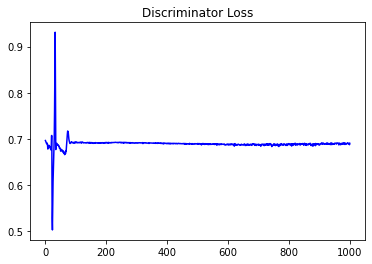

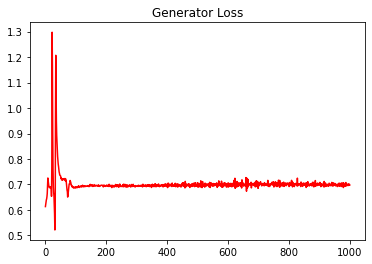

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.199344076609305


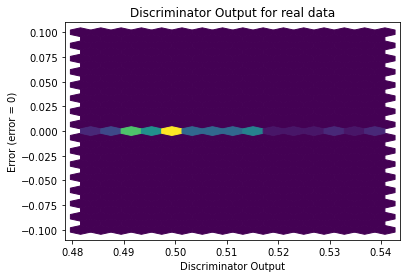

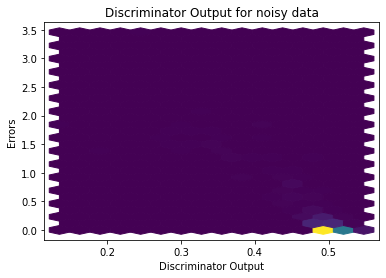

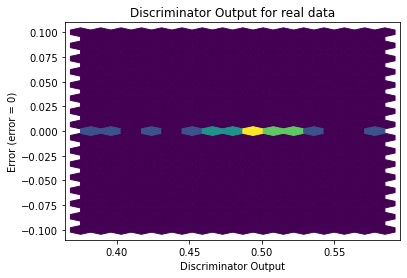

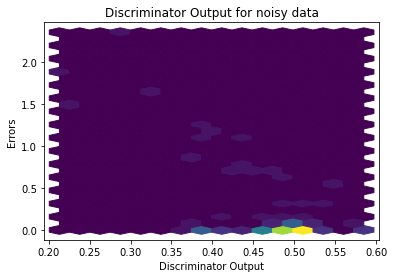

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


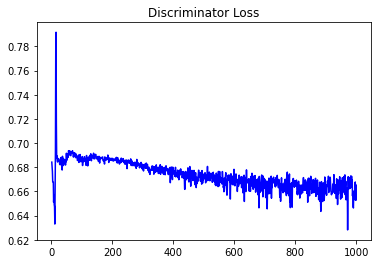

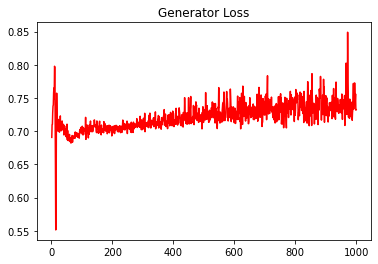

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17029750062047327


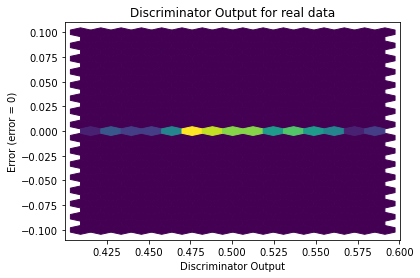

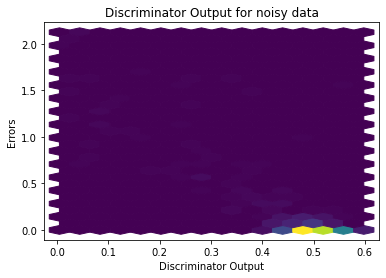

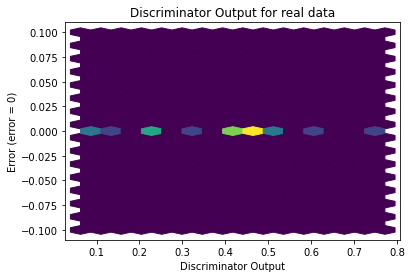

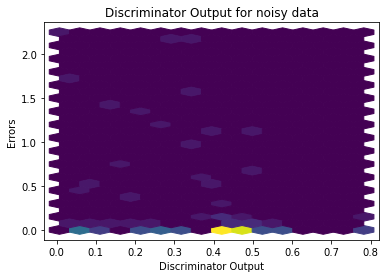

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1231]], requires_grad=True)
